<a href="https://colab.research.google.com/github/altynbektilepbergenov/Food-Sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [69]:
filename='/content/sales_predictions.csv' # I uploaded the data from csv file to gogle collab notebook
df=pd.read_csv(filename)  #Here is data below:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Cleaning the data consists of several steps: duplicated values, data types( irrelevant data, dropping them if necessary), correcting, imputing

In [70]:
# First, I wanted to check if there are any duplicated values in the dataset
df.duplicated().any()

False

In [71]:
# I got False result, it means there are any duplicated data in the dataset

In [72]:
df[df.duplicated(keep = False)] # Used this algorithm to see which data is duplicated

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [73]:
#Anyway i used drop method to remove all the duplicated values

In [74]:
df.drop_duplicates(inplace = True)

In [75]:
#  I made sure that there are no duplicated values in my data
df.duplicated().any()

False

In [76]:
# Checked data types in the dataset
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [77]:
# I checked every column data types to look for any values 
#that look weird/should be interpreted as the same things!

df['Item_Identifier'].value_counts()


FDW13    10
FDG33    10
FDQ40     9
NCF42     9
FDX31     9
         ..
FDT35     1
DRF48     1
FDO33     1
FDC23     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [78]:
#From 1st column I can see that everything is neat

In [79]:
df['Item_Weight'].value_counts() # Second column data types are also accurate

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [80]:
df['Item_Fat_Content'].value_counts() 
# Third column data types have some values which are intrepeted differently but mean the same things

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [81]:
df['Item_Visibility'].value_counts() 

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [82]:
df['Item_Type'].value_counts() 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [83]:
df['Item_MRP'].value_counts() 

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

In [84]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [85]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [86]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [87]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [88]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [89]:
df['Item_Outlet_Sales'].value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

Now, we clean the Item_Fat_Content column

In [90]:
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [91]:
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    3006
low fat     112
Name: Item_Fat_Content, dtype: int64

In [92]:
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [93]:
df.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [94]:
df.drop(columns = ['Item_Weight', 'Outlet_Size'], inplace = True)
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [95]:
#total amount of money we got from the sales
df['Item_Outlet_Sales'].sum() 

18591125.410399996

In [96]:

df.groupby('Outlet_Type')['Item_Outlet_Sales'].max() # which outlet type made more money

Outlet_Type
Grocery Store         1775.6886
Supermarket Type1    10256.6490
Supermarket Type2     6768.5228
Supermarket Type3    13086.9648
Name: Item_Outlet_Sales, dtype: float64

**Part 3 **


In [97]:
# First thing we need to do is importing matplot and seaborn libraries to our notebook, because these help us 
#to plot some histograms, boxplots, and heatmap of the correlation

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [99]:
# After that, i am going to start by plotting the boxplots to see the distributions of various features in your dataset

The next boxplot i wanted to plot is going to be plot by using the seaborn library. This boxplot is about comparing item types by their Maximum Retail Price(MRP)#by the way, i googled what MRP stands for

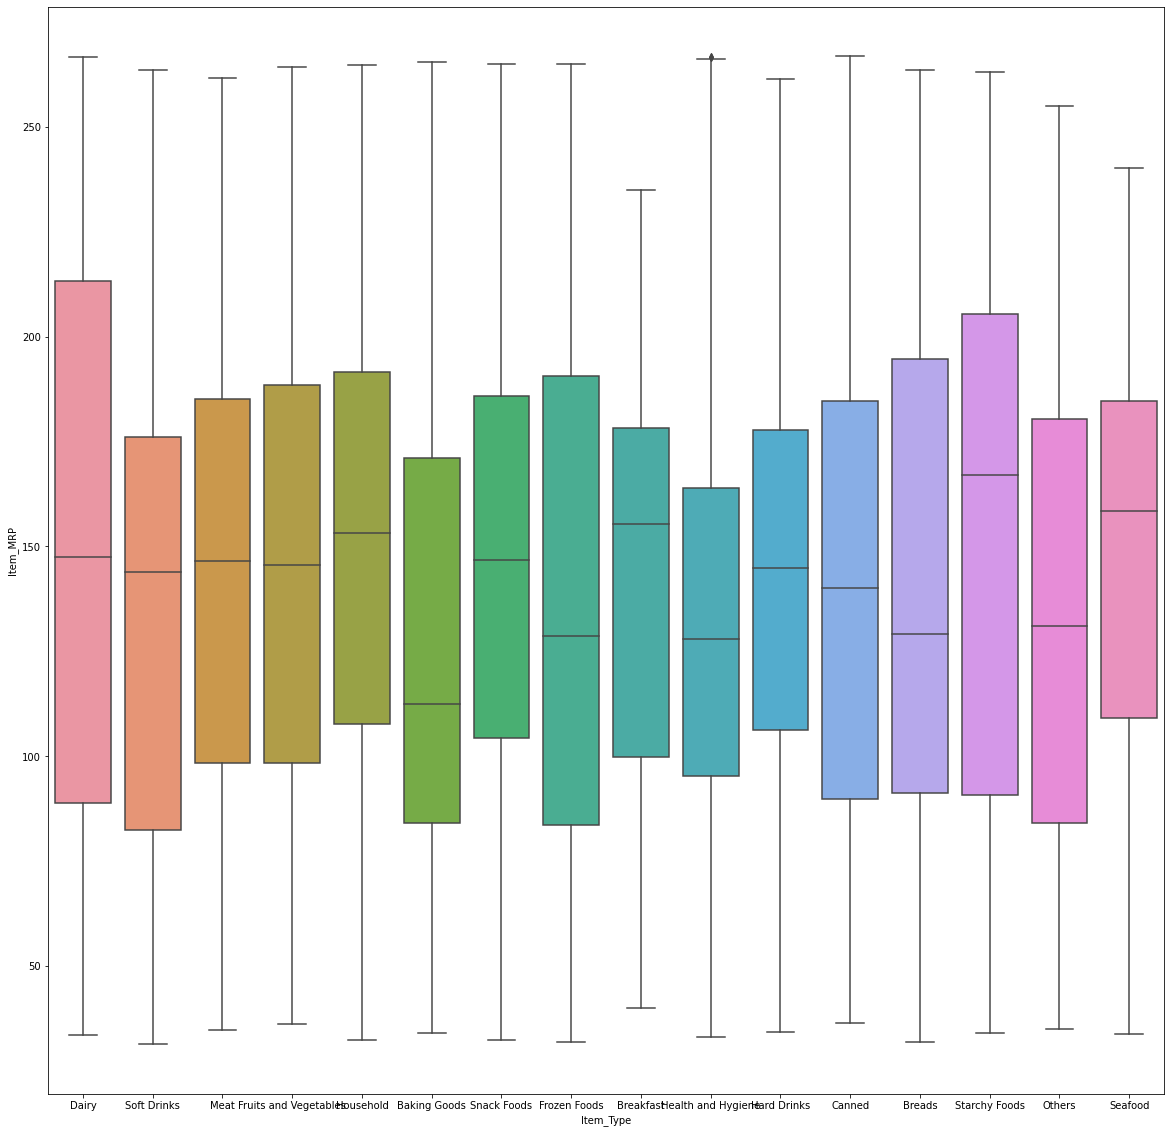

In [100]:


fig, ax = plt.subplots(figsize=(20, 20))
#df = fig.add_subplot(111)
sns.boxplot(x='Item_Type', y='Item_MRP',data=df)
plt.show() 



Conclusions:
1.Dairy, Health and Hygiene,Canned Items have the same highest maximum retail price
2. Soft Drinks, Breads have the same lowest retail price out of alll items
3. Starchy Foods has the higher mean retail price than other items
4. Health and Hygiene Item has the outlier value, it means it was sold considerably more expensive than other items at some point





/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


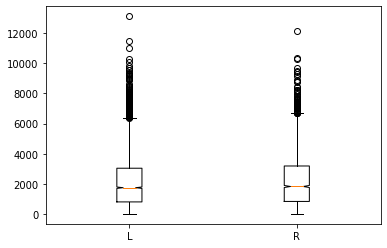

In [101]:
Low = df.loc[df['Item_Fat_Content'] =='Low Fat', 'Item_Outlet_Sales']
Regular = df.loc[df['Item_Fat_Content'] == 'Regular', 'Item_Outlet_Sales']
fig = plt.figure();
df1=df
df1 = fig.add_subplot(111)
df1.boxplot([Low,Regular], notch=True, labels=['L', 'R']);

In this boxplot i used simple plotting method to infer some data on outlet sales of items by the fat content of items(low and regular)
**Conclusions:**
1)  low fat items' outlet sales minimum value almost same with regular fat items' outlet sales minimum value.We can infer that low and regular fat content items were sold same at the minimum price

2) low fat items' outlet sales maximum value less than the regular fat items' outlet sales maximum value. We can infer that the outlet sales price for regular fat content items was slightly higher than the oulet sales price for low fat content items

3)I can also notice that there are some outliers, which are out of the range of values.Low fat content items' maximum outlier value surpasses the regular fat content items' maximum outlier value. 
I can conclude that there are some low fat content items were sold at the extremely high price than the other items in the dataset

4)I can't see any minimum outlier values in both items, it therefore means that minumim values in both items fall into quartile range

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


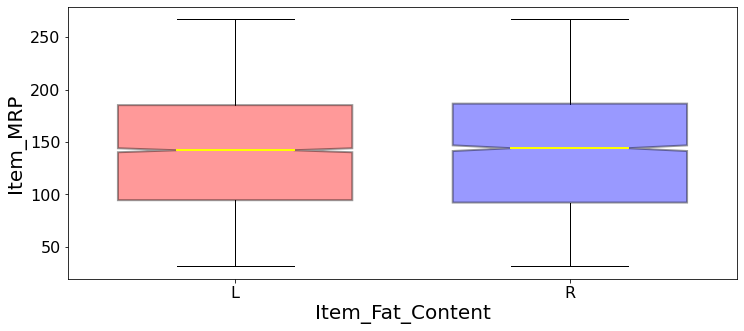

In [102]:
Low = df.loc[df['Item_Fat_Content']=='Low Fat','Item_MRP']
Regular = df.loc[df['Item_Fat_Content']=='Regular','Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))
boxplots = axes.boxplot([Low,Regular],
           notch = True,
           labels=['L', 'R'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));
# The more you understand any library, the more you can do
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Item_Fat_Content', fontsize = 20);
plt.ylabel('Item_MRP', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);



Conclusions:
1. Low fat items have same mean retail price with regular fat items' mean retail price
2.Their maximum and minimum values are identical
3.There are no outliers

 **Histograms**
 

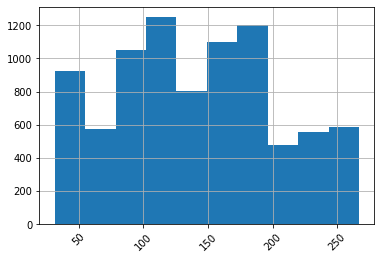

In [103]:

df['Item_MRP'].hist()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')



Conclusions:
1.This histogram has a Multi-Modal Distribution which means, the values are varied differently and can affect the outcome

2.We can see lower-limit is between 0-50 and upper-limit is between 250-300

3.Variability of Items Median Retail Price is average

4.There are no outlier, which could show data entry errors

5.Approximate range-(275-25)=250

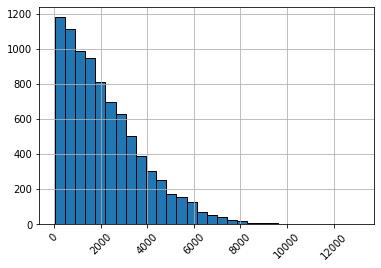

In [104]:
# visualizing a subset of the data, making more bins, and visualizing a subset of data
# this was just to explore the data


df['Item_Outlet_Sales'].hist(bins = 30, edgecolor='black');
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')



Conclusions:
1.This histogram has Skewed Distributions,because they are skewed from Left to Right direction

2.We can see the lower-limit starts from 0 and upper-limit ends by between 8000-10000

3.Variability of Items Outlet Sales is moderate

4.There are no outlier, which could show data 
entry errors

5.Approximate range-(9500-1150)=8350

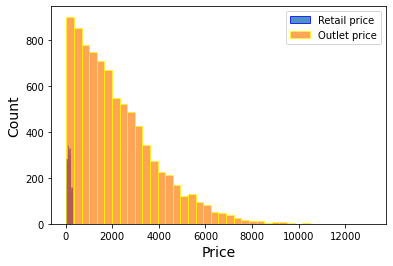

In [105]:
retail = df['Item_MRP']
outlet = df['Item_Outlet_Sales']
plt.xlabel("Price", size=14)
plt.ylabel("Count", size=14)
# plotting first histogram
plt.hist(retail,bins=40, label='Retail price', alpha=0.8, edgecolor='blue')

# plotting second histogram
plt.hist(outlet,bins=40, label='Outlet price', alpha=0.7, edgecolor='yellow')
plt.legend()

Conclusions:
1.As we can see two variables are plotted in the same histogram, and they differ from each other
2.The retail price frenquency range fall into the range of outlet price's frequency range
3.Outler price's distribution is greater than retail price's distribution
4. Standard deviation is lower in outlet sales than in the retail price

**Correlation**

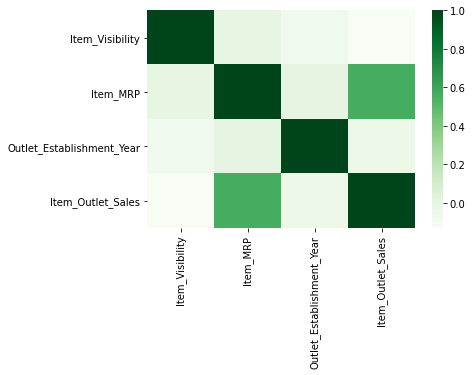

In [106]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')

Conclusions:
1.I plotted the heatmap of the correlation by using seaborn library

2.This heatmap shows **Strong Negative Correlation **between the variables

3.The diagonals are all 1/dark green because those squares are correlating each variable to itself (so it's a **perfect correlation**)

4.The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.


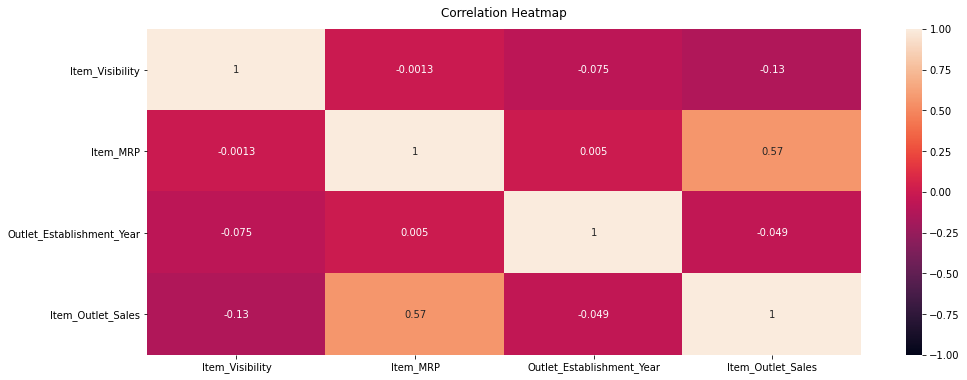

In [107]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Correlation:
1.This heatmap are easy to notice than previous one because it has real numbers

2.The correlation between Outlet_Establishment_Year and Item_MRP is low, almost close to 0, it means there is mot much relationship between these two variables

3.The correlation between Item_Oulet_Sales and Item_MRP is moderate, almost close to 0.5, it means there is postive relationship between these two variables



**The following heatmap shows the correlation by removing the perfect correlation**

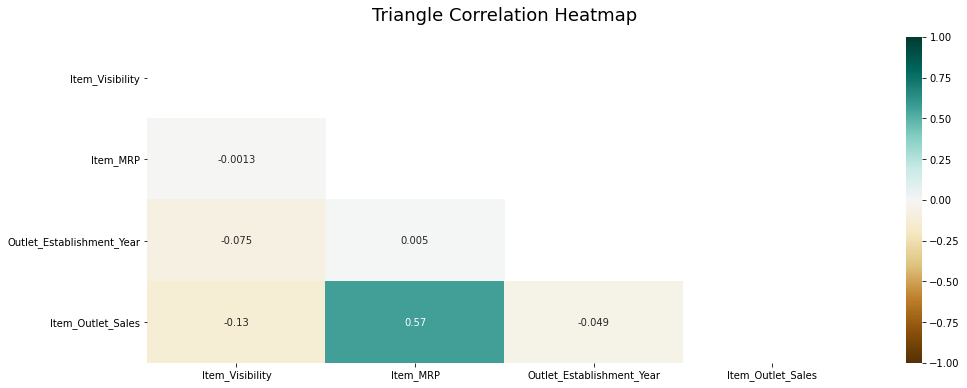

In [108]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);



The following heatmap returns the correlation of all features with ‘**Item_MRP**’, a single, dependent variable, sorted by ‘**Item_MRP**’ in a descending manner.


#*Part 3 *

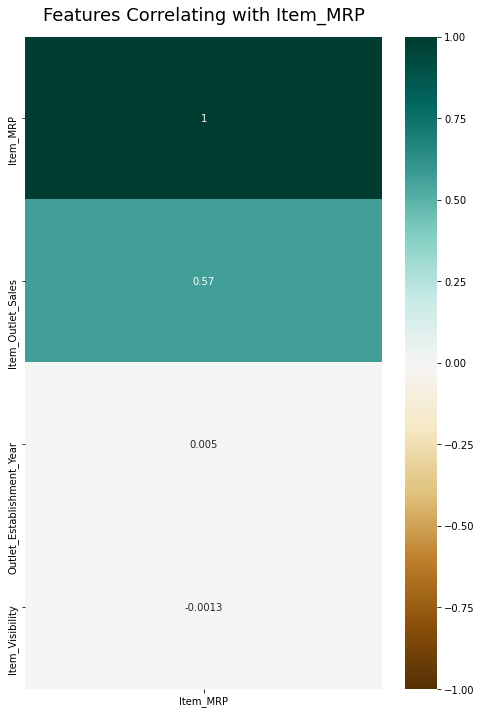

In [109]:
df.corr()[['Item_MRP']].sort_values(by='Item_MRP', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Item_MRP']].sort_values(by='Item_MRP', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Item_MRP', fontdict={'fontsize':18}, pad=16);


It is easy to notice the relationship between other variables and Item_MRP in descending manner, and we can easily identify which one is strong relationship, and low relationship

Refernces for the heatmaps of correlation: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

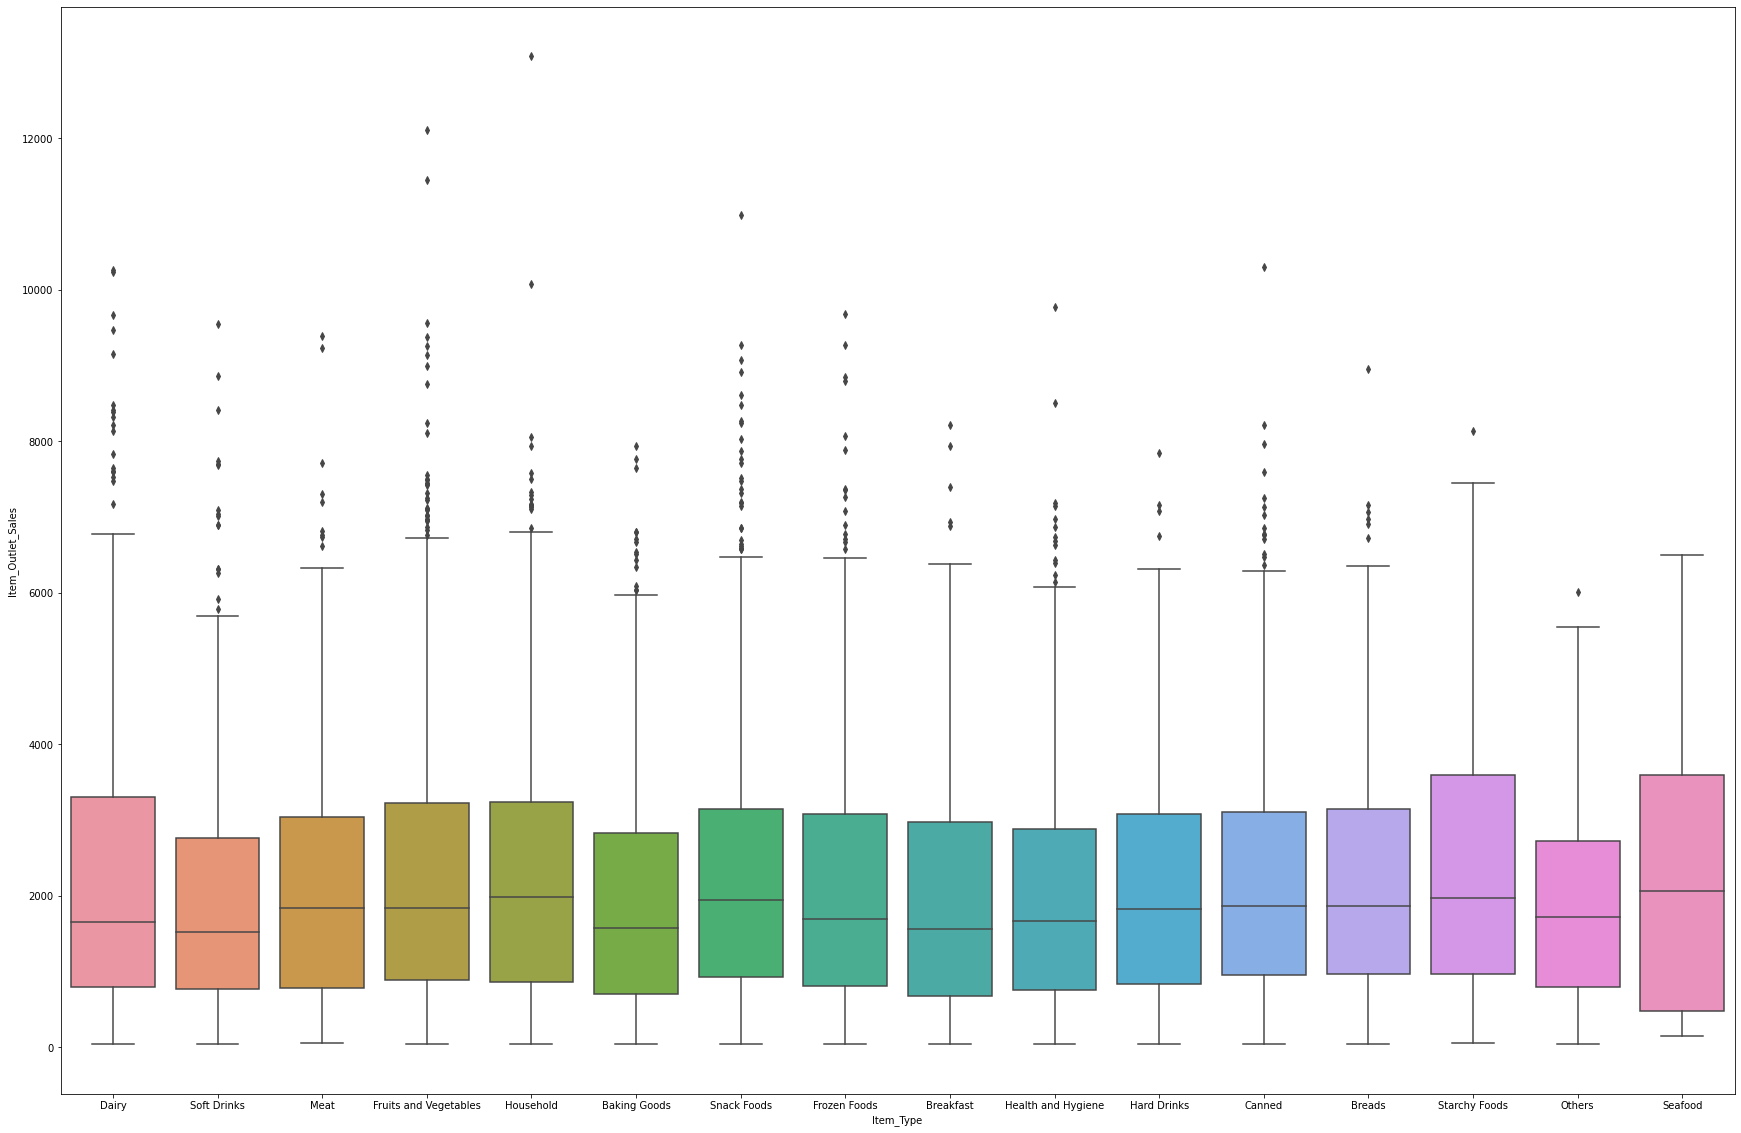

In [110]:
fig, ax = plt.subplots(figsize=(30, 20))
#df = fig.add_subplot(111)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales',data=df)
plt.show() 

Output:1. I plotted the graph,which shows the relationship between the item type and outlet sales.It means we can identify which item makes the more money in sales

2.As we can see Starchy Food, Dairy, Seafood are top sales making items

3.There are some outliers, but still these three make the most average sales

4.Maximum outlier is in Household items, which is greater than 12000, the second maximum outlier is in Fruit and Vegetables items, which is equal to 12000

ALSO, in this dataset, we do not have information about frequency of sold items, so we can skip the outliers, and infer conclusions based on average value

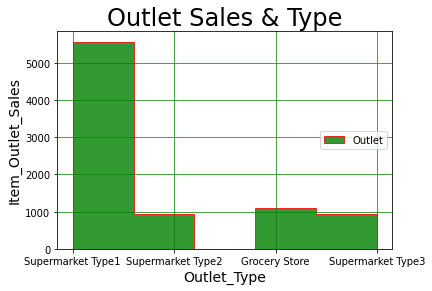

In [135]:
outlet_type = df['Outlet_Type']

plt.xlabel('Outlet_Type', size=14)
plt.ylabel('Item_Outlet_Sales', size=14)
plt.hist(outlet_type, bins=5, label='Outlet',color='green', histtype='stepfilled', alpha=0.8, edgecolor='red');
plt.grid(c='green',alpha = .9,
         linestyle = '-')
plt.title('Outlet Sales & Type', size=24);
plt.legend(loc="center right")

Output:1.In order to see the which oulet type made more item sales, i plotted the histogramm to visualize the picture

2.As we can see the Supermarket 1 has made more enough sales than any other outlet types

3.Supermarket 2,3 made the sales below 1000

4.Grocery store made the sales just above 1000